In [1]:
# Chạy cell này khi muốn crawl dữ liệu tại thời điểm hiện tại trên https://www.worldometers.info/coronavirus/
# Nếu muốn crawl lại cần reset kernel
# Tab Kernal > Reset Kernel
# Xuất ra file .csv định dạng 'Corona_WorldWide_ddMMM_hhmmhrs.csv' được lưu trong folder corona_tracking
import run_crawler

2020-06-09 14:27:47 [scrapy.utils.log] INFO: Scrapy 2.1.0 started (bot: scrapybot)
2020-06-09 14:27:47 [scrapy.utils.log] INFO: Versions: lxml 4.4.1.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)], pyOpenSSL 19.0.0 (OpenSSL 1.1.1d  10 Sep 2019), cryptography 2.7, Platform Windows-10-10.0.18362-SP0
2020-06-09 14:27:47 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2020-06-09 14:27:47 [scrapy.crawler] INFO: Overridden settings:
{}
2020-06-09 14:27:47 [scrapy.extensions.telnet] INFO: Telnet Password: 868f9d5152418a7b
2020-06-09 14:27:47 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2020-06-09 14:27:48 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scra

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
from ultils import FindByDate

In [62]:
file = FindByDate('06Jun')
total_df = pd.read_csv(file, encoding='latin-1', index_col="Country/Other", thousands=",")

In [63]:
display(total_df)

,#,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Population
Country/Other,,,,,,,,,,,,,
North America,NaN,2229176,5160.0,"133,972",692.0,898723.0,3345.0,1196481.0,19520.0,NaN,NaN,NaN,NaN
South America,NaN,1072792,484.0,"47,463",12.0,520953.0,13513.0,504376.0,11756.0,NaN,NaN,NaN,NaN
Europe,NaN,2062733,612.0,"177,978",19.0,1057051.0,1243.0,827704.0,7321.0,NaN,NaN,NaN,NaN
Asia,NaN,1299214,7091.0,"33,792",117.0,786754.0,2565.0,478668.0,14574.0,NaN,NaN,NaN,NaN
Africa,NaN,179337,NaN,"4,942",NaN,80324.0,NaN,94071.0,443.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
St. Barth,211.0,6,NaN,,NaN,6.0,NaN,0.0,NaN,608.0,NaN,137.0,13873.0
Lesotho,212.0,4,NaN,,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1515.0,708.0
Anguilla,213.0,3,NaN,,NaN,3.0,NaN,0.0,NaN,200.0,NaN,41.0,2734.0


## Tổng số ca nhiễm theo % ở mỗi khu vực

In [64]:
# Tạo sub dataframe chứa Total Cases của 6 khu vực
region_df = total_df["Total Cases"][:6]
display(region_df)

Country/Other
North America    2229176
South America    1072792
Europe           2062733
Asia             1299214
Africa            179337
Oceania             8865
Name: Total Cases, dtype: int64

In [65]:
# Tính % mỗi khu vực
sum = region_df.sum(axis=0)
percentages = []
for r in region_df:
    percentages.append(round((r / sum * 100),3))

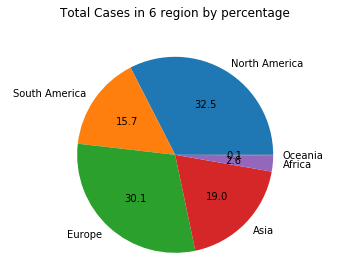

In [66]:
# Tạo pie chart
labels = region_df.index.values.tolist()
fig1, ax1 = plt.subplots()

ax1.pie(percentages, labels=labels, autopct='%1.1f')
ax1.axis('equal')
plt.title(label="Total Cases in 6 region by percentage", pad=30)

plt.show()

## Xu hướng số ca mới mỗi ngày từ ngày 6/6/2020 tới ngày 9/6/2020

In [67]:
from ultils import AllFiles
all_files = AllFiles()

In [129]:
# Đọc số liệu từ file các ngày 6,7,8,9
jun6_df = pd.read_csv(all_files[0], encoding='latin-1', index_col="Country/Other", thousands=",")
jun7_df = pd.read_csv(all_files[1], encoding='latin-1', index_col="Country/Other", thousands=",")
jun8_df = pd.read_csv(all_files[2], encoding='latin-1', index_col="Country/Other", thousands=",")
jun9_df = pd.read_csv(all_files[3], encoding='latin-1', index_col="Country/Other", thousands=",")

In [134]:
# Lọc lấy cột New Cases
jun6_nc = jun6_df["New Cases"][:6].dropna().astype('int64')
jun7_nc = jun7_df["New Cases"][:6].dropna().astype('int64')
jun8_nc = jun8_df["New Cases"][:6].dropna().astype('int64')
jun9_nc = jun9_df["New Cases"][:6].dropna().astype('int64')

In [135]:
nc_df = pd.DataFrame(index=jun6_nc.index)
nc_df = pd.concat((nc_df, jun6_nc.rename('June 6')), axis=1, sort=False)
nc_df = pd.concat((nc_df, jun7_nc.rename('June 7')), axis=1, sort=False)
nc_df = pd.concat((nc_df, jun8_nc.rename('June 8')), axis=1, sort=False)
nc_df = pd.concat((nc_df, jun9_nc.rename('June 9')), axis=1, sort=False)
display(nc_df)

,June 6,June 7,June 8,June 9
North America,5160.0,4167,4183.0,3965.0
South America,484.0,3537,285.0,308.0
Europe,612.0,487,486.0,428.0
Asia,7091.0,7724,6816.0,7008.0
Oceania,4.0,4,5.0,2.0
Africa,NaN,323,NaN,NaN


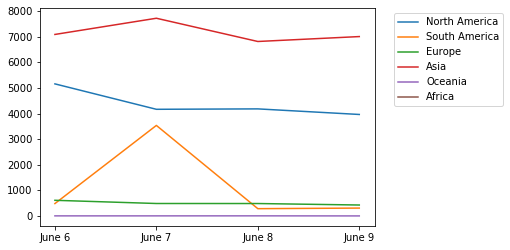

In [136]:
plt.plot(nc_df.T)
plt.legend(nc_df.T, bbox_to_anchor=(1.4,1))

Số lượng các ca nhiễm mới trong 4 ngày 6, 7, 8 và 9 tháng 6 không có nhiều biến động trừ khu vực Nam Mĩ tăng đột biến vào ngày 7.
#### Số lượng ca vẫn tăng đều theo từng ngày 